In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [2]:
! pip install mne
! pip install numpy
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import signal 

In [ ]:
SSK_usr=np.array([[9,4],[6,4],[8,3],[8,3],[7,4],[8,3]])

In [ ]:
print(SSK_usr)

[[9 4]
 [6 4]
 [8 3]
 [8 3]
 [7 4]
 [8 3]]


In [ ]:
ssk_file=open("/content/drive/MyDrive/UMindSleep/UMindSleep_Data/sskUMindSleep.csv","w")
dataframessk = pd.DataFrame({'fat_04':SSK_usr[0],'fat_06':SSK_usr[1],'fat_08':SSK_usr[2],'fat_09':SSK_usr[3],'fat_11':SSK_usr[4],'fat_12':SSK_usr[5]})
dataframessk.to_csv(ssk_file)

In [13]:
def get_segment(usr_data):
  raw_sl=mne.io.read_raw_edf(usr_data)
  sample_rate=raw_sl.info['sfreq']
  raw_data = raw_sl.get_data()
  len=raw_data[0].shape[0]
  #raw_data_arr=np.array(len)
  first_time=2
  second_time=6.5
  third_time=11

  # 2min fragment
  fragment=int(2*60*sample_rate)

  # start_point
  frist_start=int(60*first_time*sample_rate)
  second_start=int(60*second_time*sample_rate)
  third_start=int(60*third_time*sample_rate)


  # cut
  opendata1=raw_data[0][frist_start:frist_start+fragment]
  opendata2=raw_data[0][second_start:second_start+fragment]
  opendata3=raw_data[0][third_start:third_start+fragment]
  #opendata1=raw_data[0][30720:61440]
  #opendata2=raw_data[0][99840:130560]
  #opendata3=raw_data[0][168960:199680]
  return raw_sl, raw_data, len, sample_rate,opendata1,opendata2,opendata3

In [31]:
def Notch_filter(sig_data):

  fr=50
  fs=256
  Q=2
  b,a = signal.iirnotch(fr,Q,fs)
  filtedData=scipy.signal.filtfilt(b,a,sig_data)
   
 # b, a = signal.butter(8, [0.1,0.2], 'bandpass')   #配置滤波器 8 表示滤波器的阶数
 # filtedData = signal.filtfilt(b, a, filted_data)  #data为要过滤的信号

  return filtedData 

Extracting EDF parameters from /content/drive/MyDrive/UMindSleep/UMindSleep_Data/fat_04/fat_04_sl/fat_04_sl.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/UMindSleep/UMindSleep_Data/fat_04/fat_04_wk/fat_04_wk.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/UMindSleep/UMindSleep_Data/fat_06/fat_06_sl/fat_06_sl.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/UMindSleep/UMindSleep_Data/fat_06/fat_06_wk/fat_06_wk.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/UMindSleep/UMindSleep_Data/fat_08/fat_08_sl/fat_08_sl.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting

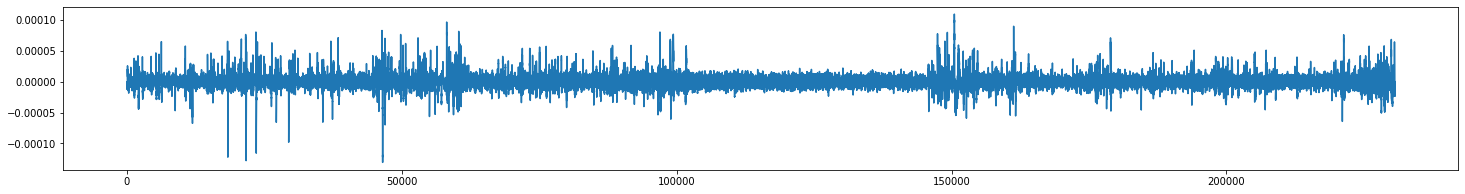

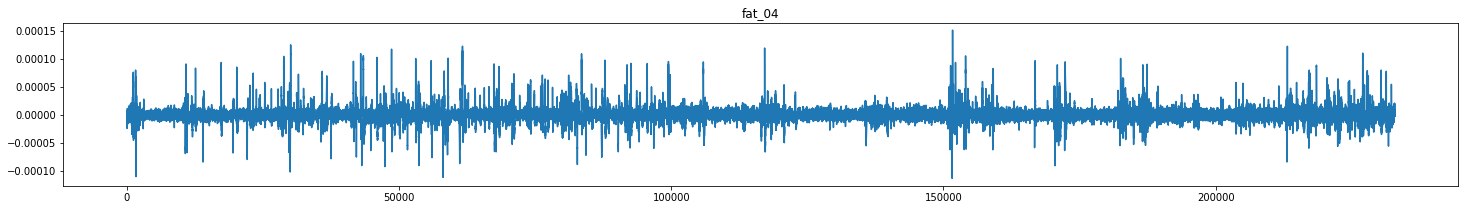

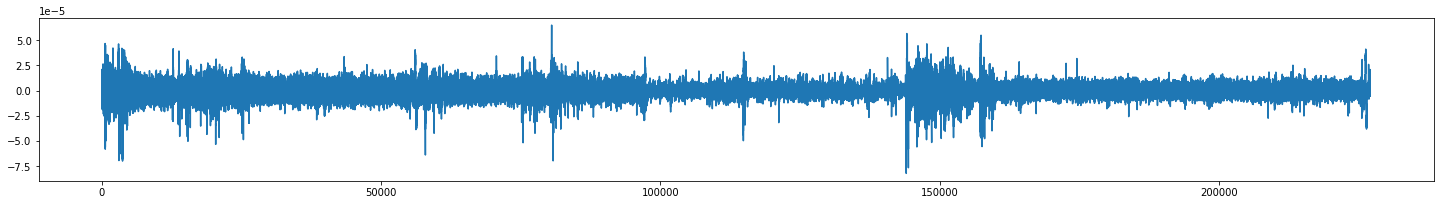

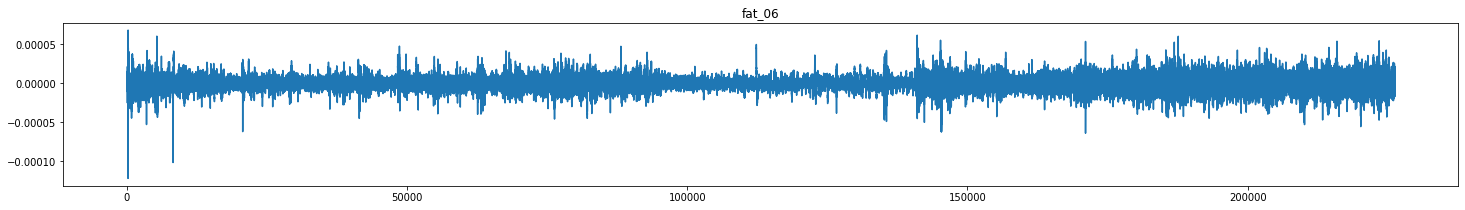

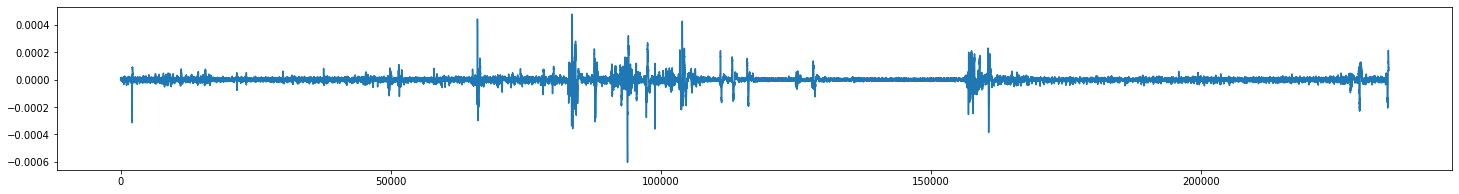

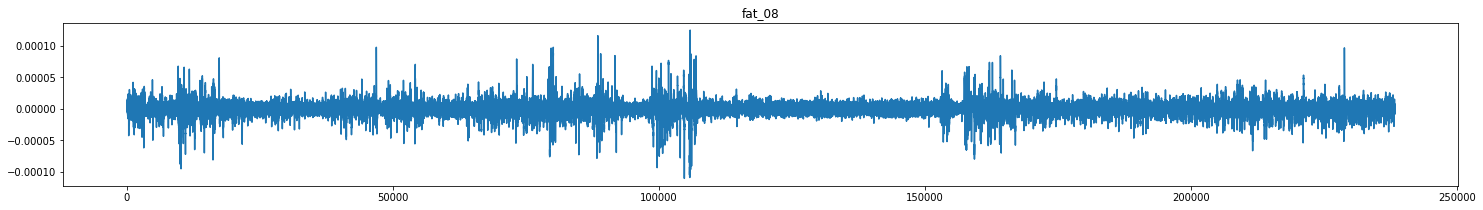

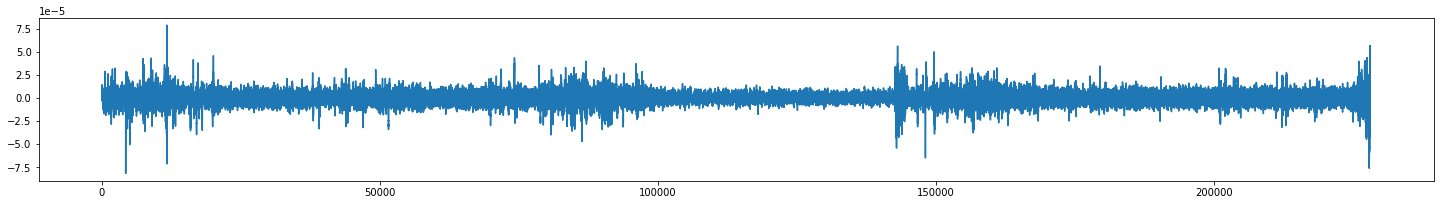

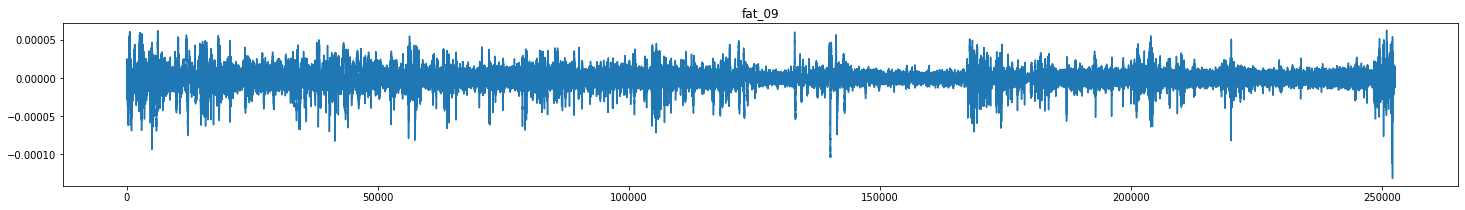

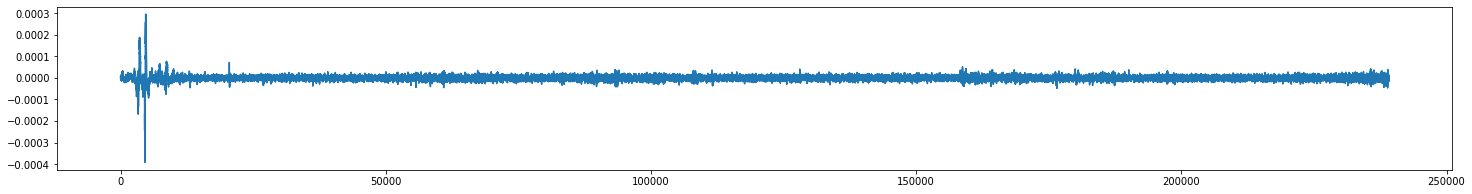

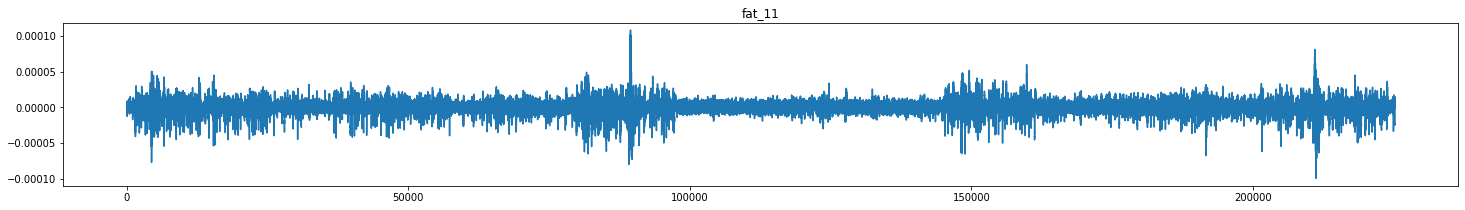

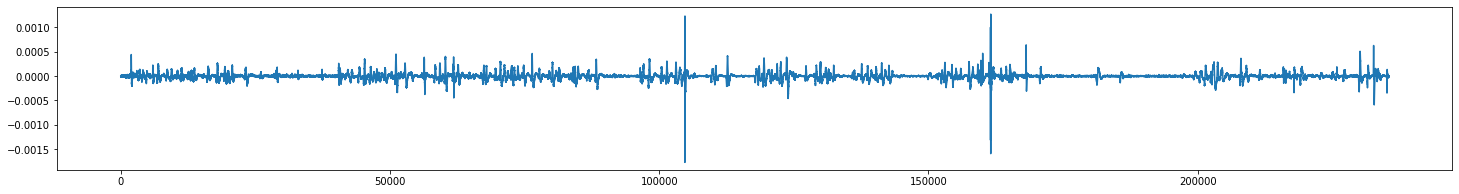

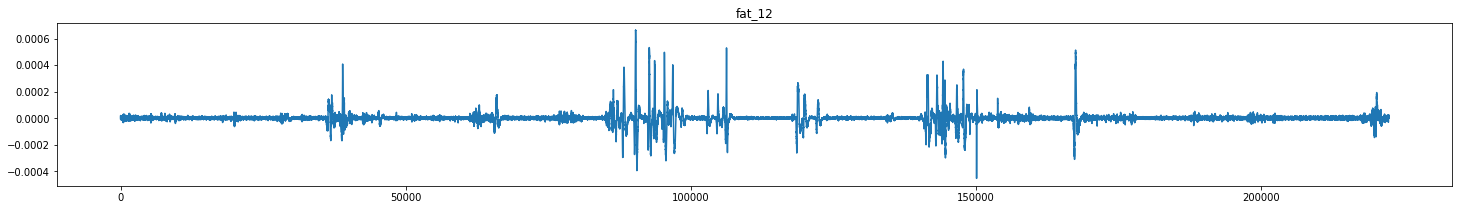

In [33]:
#test_num=1
num=['04','06','08','09','11','12']
for i in num:
#if 1:
  ID=i
  Usr_folder='fat_'+ID
  sl_folder=Usr_folder+'_sl'
  wk_folder=Usr_folder+'_wk'
  usr_file_sl=sl_folder+'.edf'
  usr_file_wk=wk_folder+'.edf'
  #print(sl_folder)
  #print(wk_folder)
  #print(usr_file_sl)
  #print(usr_file_wk)
  UMS_path="/content/drive/MyDrive/UMindSleep/UMindSleep_Data"
  usr_data_sl=os.path.join(UMS_path,Usr_folder,sl_folder,usr_file_sl)
  usr_data_wk=os.path.join(UMS_path,Usr_folder,wk_folder,usr_file_wk)
  raw_sl,raw_data_sl,len_sl,sample_rate,opendatasl1,closedatasl2,opendatasl3=get_segment(usr_data_sl)
  raw_wk,raw_data_wk,len_wk,sample_rate,opendatawk1,closedatawk2,opendatawk3=get_segment(usr_data_wk)

 # re_folder="/content/drive/MyDrive/UMindSleep/UMindSleep_Data/Segmants2min/"+Usr_folder+"seg"
#  os.mkdir(re_folder)
 # opensl1 = open(re_folder+"/fat_"+ID+"_sl_open1.csv", "w")
 # closesl2 = open(re_folder+"/fat_"+ID+"_sl_close2.csv", "w")
 # opensl3 = open(re_folder+"/fat_"+ID+"_sl_open3.csv", "w")
 # openwk1 = open(re_folder+"/fat_"+ID+"_wk_open1.csv", "w")
 # closewk2 = open(re_folder+"/fat_"+ID+"_wk_close2.csv", "w")
 # openwk3 = open(re_folder+"/fat_"+ID+"_wk_open3.csv", "w")
  filter_sl=Notch_filter(raw_data_sl[0])
  filter_wk=Notch_filter(raw_data_wk[0])
  plt.figure(figsize=(25,3))
  plt.plot(filter_sl)
  plt.figure(figsize=(25,3))
  plt.plot(filter_wk)
  plt.title(Usr_folder)
 # dataframesl1 = pd.DataFrame({'EEG':opendatasl1})
 # dataframesl1.to_csv(opensl1)
 # dataframesl2 = pd.DataFrame({'EEG':closedatasl2})
 # dataframesl2.to_csv(closesl2)
 # dataframesl3 = pd.DataFrame({'EEG':opendatasl3})
 # dataframesl3.to_csv(opensl3)
 # dataframewk1 = pd.DataFrame({'EEG':opendatawk1})
 # dataframewk1.to_csv(openwk1)
 # dataframewk2 = pd.DataFrame({'EEG':closedatawk2})
 # dataframewk2.to_csv(closewk2)
 # dataframewk3 = pd.DataFrame({'EEG':opendatawk3})
 # dataframewk3.to_csv(openwk3)
  

In [10]:
print((raw_data_sl))

[[-6.00e-06 -8.00e-06  1.00e-06 ...  7.00e-06 -4.00e-06 -3.00e-06]
 [ 1.01e+02  1.01e+02  1.01e+02 ...  9.90e+01  9.90e+01  9.90e+01]
 [ 8.80e+01  8.80e+01  8.80e+01 ...  9.70e+01  9.70e+01  9.70e+01]
 ...
 [ 0.00e+00  0.00e+00  0.00e+00 ...  0.00e+00  0.00e+00  0.00e+00]
 [ 4.00e+00  4.00e+00  4.00e+00 ...  0.00e+00  0.00e+00  0.00e+00]
 [ 8.00e+00  8.00e+00  8.00e+00 ...  0.00e+00  0.00e+00  0.00e+00]]


In [ ]:
c= np.zeros(5) 
print(c)

[0. 0. 0. 0. 0.]


In [ ]:
num=['04','06','08','09','11','12']
for i in num:
#if 1:
   ID=i
   Usr_folder='fat_'+ID+'seg/'
   UMS_path="/content/drive/MyDrive/UMindSleep/UMindSleep_Data/Segmants2min"
   usr_seg_folder=os.path.join(UMS_path,Usr_folder)
   usr_seg=os.listdir(usr_seg_folder)
   usr_seg.remove('.ipynb_checkpoints')
   print(usr_seg)
   for file in usr_seg:
     seg=open(usr_seg_folder+file,"r")
     seg_data=pd.read_csv(usr_seg_folder+file)
    # print(seg_data)
     seg_data=seg_data["EEG"].to_numpy()
    # sum=np.zeros(1280)
    # print(seg_data.shape)
     
     piece_csv="/content/drive/MyDrive/UMindSleep/UMindSleep_Data/Segments5sCSV/fat_"+ID+"/"+file[:-4]+".csv"
    # open(piece_csv,'w')
     piece_frame=pd.DataFrame()
     for j in range(0,24):
      # piece_csv="/content/drive/MyDrive/UMindSleep/UMindSleep_Data/Segmants5s/fat_"+ID+"_5s/"+file[:-4]+"_"+str(j)+".csv"
       seg_piece=seg_data[int(j*5*sample_rate):int((j+1)*5*sample_rate)]
      # piece_frame=pd.DataFrame(seg_piece)
       piece_frame[j]=seg_piece
     #print(piece_frame)
     piece_frame.to_csv(piece_csv)
       #sum+=seg_piece
     #  if(j==23):
      #   sum=sum/24
      #   plt.figure(figsize=(20, 3))
        # plt.plot(sum)

['fat_04_sl_open1.csv', 'fat_04_sl_close2.csv', 'fat_04_sl_open3.csv', 'fat_04_wk_open1.csv', 'fat_04_wk_close2.csv', 'fat_04_wk_open3.csv']
['fat_06_sl_open1.csv', 'fat_06_sl_close2.csv', 'fat_06_sl_open3.csv', 'fat_06_wk_open1.csv', 'fat_06_wk_close2.csv', 'fat_06_wk_open3.csv']
['fat_08_sl_open1.csv', 'fat_08_sl_close2.csv', 'fat_08_sl_open3.csv', 'fat_08_wk_open1.csv', 'fat_08_wk_close2.csv', 'fat_08_wk_open3.csv']
['fat_09_sl_open1.csv', 'fat_09_sl_close2.csv', 'fat_09_sl_open3.csv', 'fat_09_wk_open1.csv', 'fat_09_wk_close2.csv', 'fat_09_wk_open3.csv']
['fat_11_sl_open1.csv', 'fat_11_sl_close2.csv', 'fat_11_sl_open3.csv', 'fat_11_wk_open1.csv', 'fat_11_wk_close2.csv', 'fat_11_wk_open3.csv']
['fat_12_sl_open1.csv', 'fat_12_sl_close2.csv', 'fat_12_sl_open3.csv', 'fat_12_wk_open1.csv', 'fat_12_wk_open3.csv', 'fat_12_wk_close2.csv']


In [ ]:
print(seg_data.shape)

(30720,)
